In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Specify the file path and sheet names
file_path = 'DA Test Questions.xlsx'
sheet_names = ['Guidelines', 'Day', 'User']

# Load each sheet into separate DataFrames
dfs = pd.read_excel(file_path, sheet_name=sheet_names)

# Access the DataFrames
df_guidelines = dfs['Guidelines']
df_day = dfs['Day']
df_users = dfs['User']

# Question 1

In [3]:
print(df_day.columns)

Index(['Id', 'Date', 'Weekday', 'Emails', 'Users', 'Lagos emails',
       'Abuja emails', 'Subscriptions', 'Unsubscriptions', 'Coupons', 'Buyers',
       'Revenue', 'Other charges', 'Total revenue', 'Revenue per subscriber',
       'Revenue per user', 'Conversion'],
      dtype='object')


 Summarize the number of buyers per day and create a chart with a trend line:

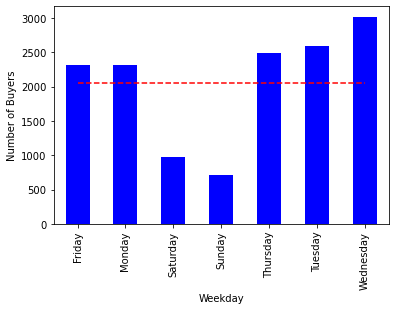

In [4]:
import matplotlib.pyplot as plt

# Summarize the number of buyers per day
buyers_per_day = df_day.groupby('Weekday')['Buyers'].sum()

# Create a chart with a trend line
fig, ax = plt.subplots()
buyers_per_day.plot(ax=ax, kind='bar', color='blue')
ax.set_ylabel('Number of Buyers')

# Add a trend line
total_buyers = buyers_per_day.sum()
trend_line = [total_buyers / len(buyers_per_day)] * len(buyers_per_day)
ax.plot(buyers_per_day.index, trend_line, linestyle='--', color='red')

# Show the chart
plt.show()

 Calculate the average, total, maximum, and minimum number of buyers over the period:

In [5]:
average_buyers = df_day['Buyers'].mean()
total_buyers = df_day['Buyers'].sum()
max_buyers = df_day['Buyers'].max()
min_buyers = df_day['Buyers'].min()

print("Average buyers per day: ", average_buyers)
print("Total buyers over the period: ", total_buyers)
print("Maximum buyers over the period: ", max_buyers)
print("Minimum buyers over the period: ", min_buyers)

Average buyers per day:  236.39344262295083
Total buyers over the period:  14420
Maximum buyers over the period:  781
Minimum buyers over the period:  46


 Determine the weekday that generated the most money:

In [6]:
weekday_most_money = df_day.groupby('Weekday')['Revenue'].sum().idxmax()
print("Weekday that generated the most money: ", weekday_most_money)

Weekday that generated the most money:  Wednesday


# Question 2 

In [7]:
df_transactions = pd.read_excel('DA Test Questions.xlsx', sheet_name='Transactions')

In [8]:
print(df_transactions.columns)

Index(['Day', 'Transaction no', 'Deal no', 'Deal desc', 'Deal merchant',
       'Deal category', 'Sales person', 'Deal discount', 'Qty offered', 'User',
       'Sate', 'User name', 'Coupons purchased', 'Unit price', 'Gross revenue',
       'Merchant take', 'Merchant take percent', 'Email'],
      dtype='object')


Find the top 10 merchants based on coupons sold:

In [9]:
top_merchants = df_transactions.pivot_table(index='Deal merchant', values='Coupons purchased', aggfunc='sum').nlargest(10, 'Coupons purchased')
print("Top 10 merchants based on coupons sold:")
print(top_merchants)

Top 10 merchants based on coupons sold:
                          Coupons purchased
Deal merchant                              
DealDey                                9236
Benchmark Technologies                  542
Better Covenant Ventures                496
Lotus Body & Baths                      332
HMO Collections                         330
Sarah's Choice Ventures                 316
Vera's Place                            313
NS 1463 Clothing Co.                    309
Huntella Gadgets                        306
Fouani Nigeria Limited                  301


Determine the number of coupons sold per category during the period

In [10]:
coupons_per_category = df_transactions.pivot_table(index='Deal category', values='Coupons purchased', aggfunc='sum')
print("Number of coupons sold per category during the period:")
print(coupons_per_category)

Number of coupons sold per category during the period:
                       Coupons purchased
Deal category                           
City                                8642
Fashion & Style                     7551
Gadgets & Electronics               3677
Home & Decor                        6548
Travel                               128


Calculate the percentage of coupons sold per category during the period

In [11]:
total_coupons_sold = df_transactions['Coupons purchased'].sum()
coupons_percentage_per_category = (coupons_per_category / total_coupons_sold) * 100
print("Percentage of coupons sold per category during the period:")
print(coupons_percentage_per_category)

Percentage of coupons sold per category during the period:
                       Coupons purchased
Deal category                           
City                           32.554811
Fashion & Style                28.444963
Gadgets & Electronics          13.851428
Home & Decor                   24.666616
Travel                          0.482182


Find the average price (price point) for different categories sold during the period:

In [12]:
average_price_per_category = df_transactions.pivot_table(index='Deal category', values='Unit price', aggfunc='mean')
print("Average price for different categories sold during the period:")
print(average_price_per_category)

Average price for different categories sold during the period:
                         Unit price
Deal category                      
City                    2550.513451
Fashion & Style         3786.703240
Gadgets & Electronics   8332.497853
Home & Decor            2769.083348
Travel                 52345.454545


Present the top 5 states from which our customers came:

In [13]:
top_states = df_transactions.pivot_table(index='Sate', values='User', aggfunc='count')
top_states = top_states.nlargest(5, 'User')
print("Top 5 states where our customers came from:")
print(top_states)

Top 5 states where our customers came from:
         User
Sate         
Lagos   19608
Abuja    2258
Rivers    266
Delta      88
Edo        71


In [14]:
transaction_columns = df_transactions.columns
print("Transaction columns:")
print(transaction_columns)

Transaction columns:
Index(['Day', 'Transaction no', 'Deal no', 'Deal desc', 'Deal merchant',
       'Deal category', 'Sales person', 'Deal discount', 'Qty offered', 'User',
       'Sate', 'User name', 'Coupons purchased', 'Unit price', 'Gross revenue',
       'Merchant take', 'Merchant take percent', 'Email'],
      dtype='object')


In [15]:
User_columns = df_users.columns
print("User columns:")
print(User_columns)

User columns:
Index(['User', 'Sign Up Date', 'Referrer', '1=no referral', 'Email', 'State',
       'First Purchase Date', 'Year', 'Month', 'First Purchase Deal Title',
       'First Purchase Root Category', 'First Purchase Sub Category',
       'First Purchase Leaf Category', 'Unit Price', 'Quantity',
       'First Purchase', 'Total No Of Purchase', 'Total Spent',
       'Total Cod Plus Shipping Charges', 'No Of Referrers', 'Age Bracket',
       'Gender', 'Mobile No', 'Days From Signup To First Purchase',
       'Days Since Last Purchase'],
      dtype='object')


In [16]:
print("Transaction columns:")
print(df_transactions.columns.tolist())

print("User columns:")
print(df_users.columns.tolist())

Transaction columns:
['Day', 'Transaction no', 'Deal no', 'Deal desc', 'Deal merchant', 'Deal category', 'Sales person', 'Deal discount', 'Qty offered', 'User', 'Sate', 'User name', 'Coupons purchased', 'Unit price', 'Gross revenue', 'Merchant take', 'Merchant take percent', 'Email']
User columns:
['User', 'Sign Up Date', 'Referrer', '1=no referral', 'Email', 'State', 'First Purchase Date', 'Year', 'Month', 'First Purchase Deal Title', 'First Purchase Root Category', 'First Purchase Sub Category', 'First Purchase Leaf Category', 'Unit Price', 'Quantity', 'First Purchase', 'Total No Of Purchase', 'Total Spent', 'Total Cod Plus Shipping Charges', 'No Of Referrers', 'Age Bracket', 'Gender', 'Mobile No', 'Days From Signup To First Purchase', 'Days Since Last Purchase']


In [17]:
merged_data = pd.merge(df_transactions, df_users, left_on='User', right_on='User', how='left')

In [18]:
merged_columns = merged_data.columns
print(merged_columns)

Index(['Day', 'Transaction no', 'Deal no', 'Deal desc', 'Deal merchant',
       'Deal category', 'Sales person', 'Deal discount', 'Qty offered', 'User',
       'Sate', 'User name', 'Coupons purchased', 'Unit price', 'Gross revenue',
       'Merchant take', 'Merchant take percent', 'Email_x', 'Sign Up Date',
       'Referrer', '1=no referral', 'Email_y', 'State', 'First Purchase Date',
       'Year', 'Month', 'First Purchase Deal Title',
       'First Purchase Root Category', 'First Purchase Sub Category',
       'First Purchase Leaf Category', 'Unit Price', 'Quantity',
       'First Purchase', 'Total No Of Purchase', 'Total Spent',
       'Total Cod Plus Shipping Charges', 'No Of Referrers', 'Age Bracket',
       'Gender', 'Mobile No', 'Days From Signup To First Purchase',
       'Days Since Last Purchase'],
      dtype='object')


In [19]:
# Rename 'Email_x' to 'Email'
merged_data.rename(columns={'Email_x': 'Email'}, inplace=True)

# Drop the 'Email_y' column
merged_data.drop('Email_y', axis=1, inplace=True)

In [20]:
merged_data.head()

,Day,Transaction no,Deal no,Deal desc,Deal merchant,Deal category,Sales person,Deal discount,Qty offered,User,...,First Purchase,Total No Of Purchase,Total Spent,Total Cod Plus Shipping Charges,No Of Referrers,Age Bracket,Gender,Mobile No,Days From Signup To First Purchase,Days Since Last Purchase
0,2013-06-01,13700485665286,13934,"Full Body G5 Massage, Steam Bath & Pedicure",House of Tay,City,NaN,4500.0,NaN,26171,...,1440.0,85,309338.0,0,2.0,26-30,Female,8.120797e+09,0,57
1,2013-06-01,13700516237562,13901,All You Can Eat Weekend Buffet Brunch,Cafe Jade,City,NaN,1900.0,NaN,28086,...,6500.0,10,62250.0,500,NaN,38-45,Male,8.030493e+09,228,51
2,2013-06-01,13700575808346,14022,Deluxe USB LED Flexi Keyboard Light,DealDey,Gadgets & Electronics,NaN,700.0,48.0,74974,...,1000.0,21,85650.0,0,NaN,18-25,Male,7.088554e+09,61,40
3,2013-06-01,13700609692958,13739,Solar Powered 80 LED Security Floodlight with ...,Depth2heights Global Inv,Gadgets & Electronics,NaN,5000.0,30.0,107804,...,12000.0,350,1473880.0,143200,NaN,31-37,Male,8.097522e+09,0,5
4,2013-06-01,13700609693152,13843,Magic Rotating Lint Brush,DealDey,Home & Decor,NaN,1200.0,48.0,107804,...,12000.0,350,1473880.0,143200,NaN,31-37,Male,8.097522e+09,0,5
